In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ozkan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Ozkan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Ozkan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Ozkan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
data=pd.read_csv('Temps.csv', parse_dates=['dt']) #dt'yi datetime'e çevirdik!_!

In [10]:
data.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
data.dtypes #dt object ama zamanı veriyor buraya dikkat!

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
dt                               239177 non-null datetime64[ns]
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [14]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [15]:
#verileri dönüştürmek data.to_pickle veya data.to_parquet gibi şeylere dönebiliyor Ö:data.to_parquet("data.parquet") gibi

In [16]:
data.shape


(239177, 7)

In [18]:
data.isna() #boş olanlar true döncek biz bunları toplamı için 1 sonraki cell'de 

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239172,False,False,False,False,False,False,False
239173,False,False,False,False,False,False,False
239174,False,False,False,False,False,False,False
239175,False,False,False,False,False,False,False


In [20]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [21]:
#data satırlarının yüzde kaçının kaybının olduğunu bulmak için:
data.isna().sum() / data.shape[0] * 100 #data_shape[0]=satır sayısı.

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [22]:
 # yani averagTemp. kolonumun yüzde 4.59'u boş değerlerden oluşuyor

In [23]:
data_prepared=data.dropna(axis=0,how='any')

In [25]:
data_prepared.shape

(228175, 7)

In [27]:
data_prepared.isna().sum() #gördügümüz gibi boş değer yok !_!

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [28]:
data_prepared.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [29]:
#seri ile dtFrame farkı sadece[] 1 tane fazla olması ö:

In [30]:
type(data_prepared['City'])

pandas.core.series.Series

In [31]:
type(data_prepared[['City']])

pandas.core.frame.DataFrame

In [32]:
data_prepared[['City','Country']]

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [33]:
#Kaçar tane country olduğunu görmek için:

In [34]:
data_prepared['Country'].value_counts()

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
France                                 3166
United Kingdom                         3166
Ukraine                                3166
Germany                                3166
Spain                                  3166
Italy                                  3166
Morocco                         

In [35]:
#kaç tane ülke oldugunu bulmak için
data_prepared['Country'].value_counts().shape

(49,)

In [36]:
data_prepared[data_prepared['Country']=='Turkey'] #Tr verilerini getirdi sağ taraf maske sol taraf DataFrame

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [38]:
#Tr veya Brazilya olan değerleri getirmek için
data_prepared[(data_prepared['Country']=='Turkey') | (data_prepared['Country']=='Brazil')]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [44]:
#ülkesi tr ve sıcaklıgı 20den yüksek olanları getir dersek
data_prepared[(data_prepared['Country']=='Turkey') & (data_prepared['AverageTemperature']>20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
11900,1755-08-01,20.793,2.475,Ankara,Turkey,39.38N,33.29E
11910,1756-06-01,20.433,2.512,Ankara,Turkey,39.38N,33.29E
11911,1756-07-01,21.761,1.996,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96611,2012-10-01,21.292,0.574,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [45]:
data_prepared[data_prepared['Country'].isin(['Turkey','Brazil','United States'])]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [47]:
data_prepared[data_prepared['Country'].isin(['Turkey','Brazil','United States'])]['Country'].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [48]:
secılen_ulkeler =data_prepared[data_prepared['Country'].isin(['Turkey','Brazil','United States'])]

In [50]:
secılen_ulkeler.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [51]:
secılen_ulkeler['Country'].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [52]:
secılen_ulkeler.groupby(by='Country').mean() #country'e göre grupla ve ortalamasını al 

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [53]:
secılen_ulkeler.groupby(by='Country').max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [54]:
secılen_ulkeler.groupby(by='Country').agg(['min','mean','max'])

AverageTemperature                     \
                             min       mean     max   
Country                                               
Brazil                    13.536  22.847555  29.986   
Turkey                    -6.280  13.790998  29.845   
United States             -9.162  11.257246  29.141   

              AverageTemperatureUncertainty                    
                                        min      mean     max  
Country                                                        
Brazil                                0.040  0.877419   5.277  
Turkey                                0.062  1.391654   8.459  
United States                         0.075  1.200292  10.193

In [55]:
secılen_ulkeler.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [56]:
tr_ortalama_sıcaklık = secılen_ulkeler[secılen_ulkeler['Country']=='Turkey']['AverageTemperature']

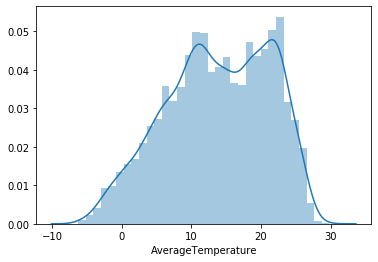

In [57]:
sns.distplot(tr_ortalama_sıcaklık)

In [60]:
ulkeler = secılen_ulkeler['Country'].unique()

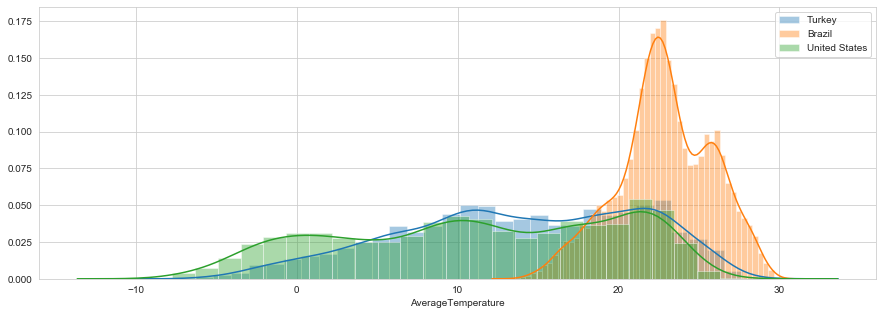

In [69]:
sns.set_style('whitegrid') #arkadaki kare
plt.figure(figsize=(15,5)) #boyutu büyüttük


for ulke in ulkeler:
    sns.distplot(secılen_ulkeler[secılen_ulkeler['Country']==ulke]['AverageTemperature'])
 

#en sona yazıyoruz
plt.legend(ulkeler) #temsil eden ülkeleri gösteriyor

In [ ]:
#otomatik

In [81]:
secılen_ulkeler.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

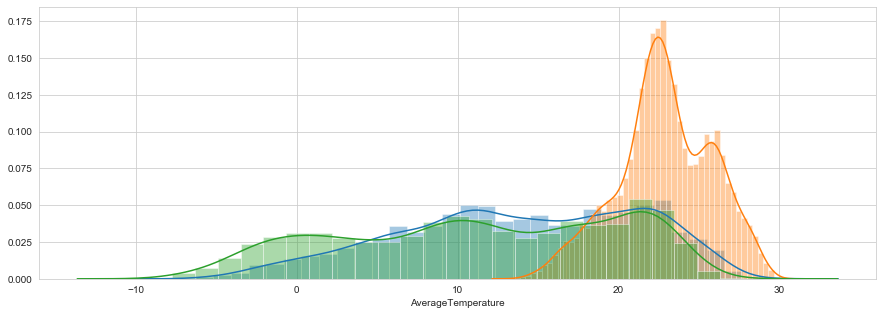

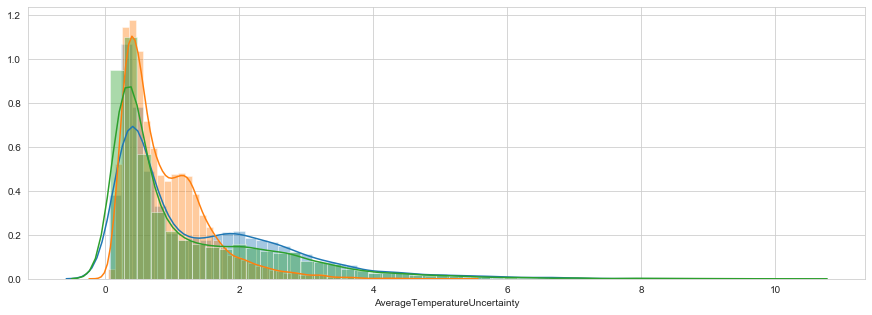

In [86]:
#Sütunları grafikleştirmek

kolonlar=secılen_ulkeler.columns[1:3]
ulkeler=secılen_ulkeler['Country'].unique()
for kolon in kolonlar:
    plt.figure(figsize=(15,5))
    
    for ulke in ulkeler:
        sns.distplot(secılen_ulkeler[secılen_ulkeler['Country']==ulke][kolon])
    plt.show()

In [87]:
#scatter_plot

In [91]:
tr_data=secılen_ulkeler[(secılen_ulkeler['Country']=='Turkey' ) & (secılen_ulkeler['dt']>'01.01.1997')]

In [93]:
tr_data.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
14798,1997-02-01,-1.122,0.526,Ankara,Turkey,39.38N,33.29E
14799,1997-03-01,2.961,0.470,Ankara,Turkey,39.38N,33.29E
14800,1997-04-01,6.787,0.230,Ankara,Turkey,39.38N,33.29E


C:\Users\Ozkan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


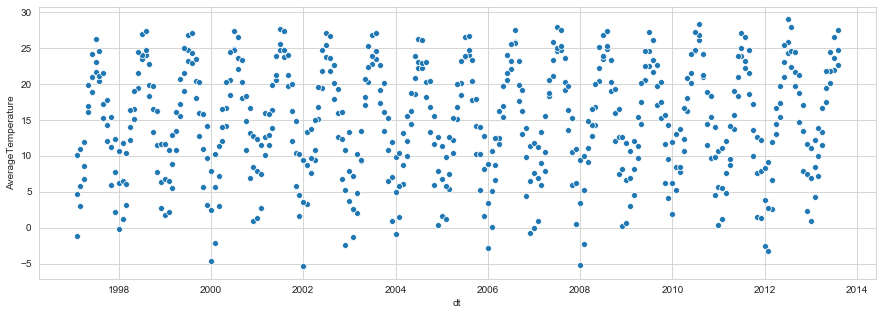

In [94]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="dt",y='AverageTemperature',data=tr_data)

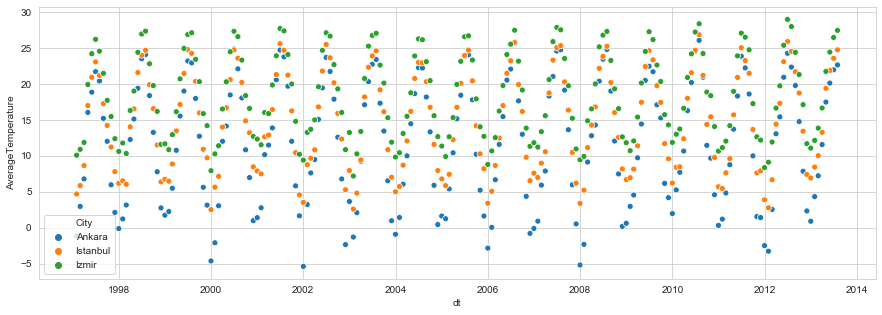

In [96]:
plt.figure(figsize=(15,5)) 
sns.scatterplot(x="dt",y='AverageTemperature',data=tr_data,hue='City') #hue parametresi ile şehirleri renk renk böldü ve renklendirdi.


In [124]:
tr_gercek_data=tr_data.drop(['level_0','index','City','Country','Latitude','Longitude'],axis=1)
tr_gercek_data.head

<bound method NDFrame.head of             dt  AverageTemperature  AverageTemperatureUncertainty
0   1997-02-01              -1.122                          0.526
1   1997-03-01               2.961                          0.470
2   1997-04-01               6.787                          0.230
3   1997-05-01              16.030                          0.260
4   1997-06-01              18.843                          0.273
..         ...                 ...                            ...
592 2013-04-01              16.643                          0.337
593 2013-05-01              21.723                          0.407
594 2013-06-01              24.416                          0.589
595 2013-07-01              26.451                          0.277
596 2013-08-01              27.430                          0.220

[597 rows x 3 columns]>

In [122]:
tr_gercek_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
dt                               597 non-null datetime64[ns]
AverageTemperature               597 non-null float64
AverageTemperatureUncertainty    597 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 14.1 KB


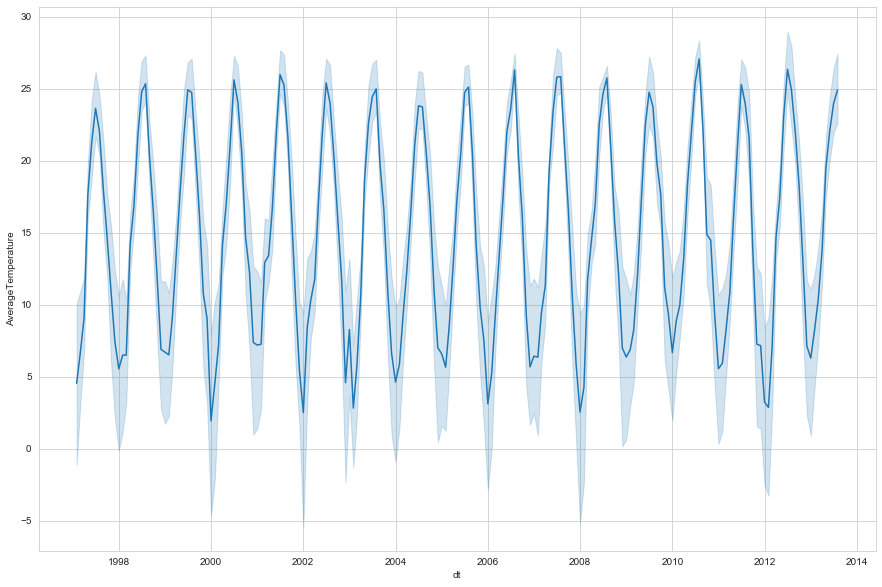

In [130]:
plt.figure(figsize=(15,10))
sns.lineplot(x="dt",y="AverageTemperature",data=tr_gercek_data)

In [132]:
data_1900 =secılen_ulkeler[secılen_ulkeler["dt"]>"01.01.1900"]
data_1900.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E


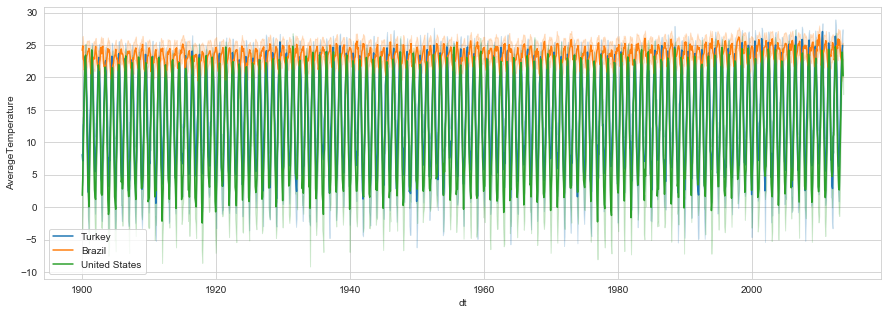

In [139]:
plt.figure(figsize=(15,5))
for ulke in data_1900["Country"].unique():
        data=data_1900[data_1900["Country"]==ulke]
        sns.lineplot(x="dt",y="AverageTemperature",data=data)
        
plt.legend(data_1900["Country"].unique())